### LOADING LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

%matplotlib inline

In [23]:
# !pip install spacy

In [6]:
import spacy
from spacy.tokenizer import Tokenizer

### LOADING DATA

In [12]:
df= pd.read_csv('all_data_2.csv').drop('Unnamed: 0', axis=1)
df.shape

(1277, 8)

In [13]:
df.head()

,name,title,url,banner_url,subscribers,active_accounts,score,text
0,homelab,homelabbity,/r/homelab/,https://b.thumbs.redditmedia.com/lNMArMz89W41X...,232474,939,46009,Join The Discord.Boring Apartment LabIt’s a st...
1,NintendoSwitchDeals,Nintendo Switch Deals,/r/NintendoSwitchDeals/,https://b.thumbs.redditmedia.com/taVHrbtSvxFAm...,185390,1525,106432,Current Nintendo Switch eShop dealsCreating a ...
2,FunWithFriends,Friends Having Fun!!!,/r/FunWithFriends/,NaN,226973,346,78780,Friend joins for some extra funQuick compariso...
3,blackdesertonline,Black Desert Online,/r/blackdesertonline/,https://b.thumbs.redditmedia.com/mbR_Vc6X_O0vn...,127462,1275,32581,Daily Questions and Answers PostPatch Notes - ...
4,CanadaPolitics,Canada Politics,/r/CanadaPolitics/,NaN,96530,431,90752,"Free Speech Friday - November 15, 2019Singh sa..."


### DATA EXPLORATION

In [10]:
#Remove / and r from title
### TODO 

In [14]:
df.isnull().sum()

name                 0
title                0
url                  0
banner_url         988
subscribers          0
active_accounts      0
score                0
text                 0
dtype: int64

In [15]:
#The amount of nulls in banner url is significative (74.7%)--- We can think in drop this column 
3673/4917

0.7470002033760423

In [16]:
df.dtypes

name               object
title              object
url                object
banner_url         object
subscribers         int64
active_accounts     int64
score               int64
text               object
dtype: object

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subscribers,1277.0,132892.127643,90571.006502,1556.0,50486.0,118352.0,200116.0,365587.0
active_accounts,1277.0,338.512921,516.690766,0.0,122.0,221.0,413.0,13199.0
score,1277.0,173368.609240,254011.215576,76.0,36935.0,92617.0,200131.0,2709079.0


In [18]:
df.describe(exclude='number').T

,count,unique,top,freq
name,1277,1277,ShaneDawson,1
title,1277,1277,Hotties For Trump,1
url,1277,1277,/r/antifastonetoss/,1
banner_url,289,288,https://b.thumbs.redditmedia.com/w0dQDZVHU-UQy...,2
text,1277,1277,Who owns your favorite privacy service? What i...,1


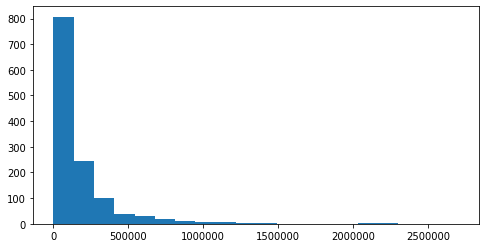

In [19]:
plt.figure(figsize=(8, 4))
plt.hist(df['score'], bins=20);

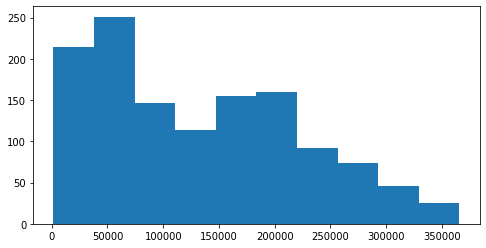

In [20]:
plt.figure(figsize=(8, 4))
plt.hist(df['subscribers']);

In [21]:
df['name'].value_counts()

ShaneDawson              1
Break_Yo_Dick_Thick      1
ForwardsFromKlandma      1
longrange                1
EDC                      1
                        ..
DokkanBattleCommunity    1
CODZombies               1
hugefutanari             1
BrandiLove               1
simps                    1
Name: name, Length: 1277, dtype: int64

### Use Scikit-Learn's CountVectorizer

In [23]:
vect = CountVectorizer(stop_words='english')

In [24]:
vect.fit(df['text'])
dtm = vect.transform(df['text'])

In [25]:
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [26]:
doc_len = [len(doc) for doc in df['text']]

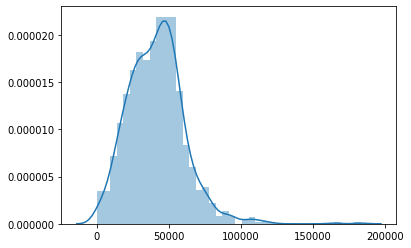

In [27]:
sns.distplot(doc_len);

### TfidfVectorize

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df['text'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,00,000,0000,000000000000004lbs,00000001,000000c1,0000065432are,0000065432mike,00000japan,000028478,...,𝚝𝚘,𝚞𝚗𝚗𝚗𝚗𝚗𝚏,𝚠𝚊𝚗𝚗𝚊,𝚠𝚊𝚛𝚖,𝚠𝚊𝚜,𝚠𝚎𝚕𝚕,𝚠𝚒𝚏𝚏𝚏𝚏𝚏𝚏,𝟗𝐀𝐌,𝟷𝟾,𝟻𝟼
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.015364,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.006968,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.003896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.007904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# import spacy
# nlp = spacy.load('en') 

In [38]:
# ### Tokenize
# def tokenize(document):
    
#     doc = nlp(document)
    
#     return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [62]:

# # Tunning Parameters
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Instantiate vectorizer object
# tfidf = TfidfVectorizer(tokenizer=tokenize, min_df=0.025, max_df=.98, ngram_range=(1,2))

# # Create a vocabulary and get word counts per document
# dtm = tfidf.fit_transform(df['text']) # Similiar to fit_predict

# # Print word counts

# # Get feature names to use as dataframe column headers
# dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# # View Feature Matrix as DataFrame
# dtm.head()

### NearestNeighbor (K-NN)

In [41]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
# # Query Using kneighbors 
# nn.kneighbors([dtm.iloc[114]])

In [ ]:
# # Our Similarity Matrix is ? size 
# df.shape

In [67]:
reddit_test = [""" Few people realize 61.8% of Lambda School students DO NOT have a Bachelor’s Degree.

Regardless, in less than a year they’re landing high-paying jobs in lasting careers. 

They pay nothing upfront, will only make payments at all for two years, and will never pay more than $30k.  """]

In [68]:

# Query for Sim of Random doc to BBC
new = tfidf.transform(reddit_test)

nn.kneighbors(new.todense())

(array([[1.29899493, 1.31485336, 1.3505246 , 1.3572382 , 1.35770732]]),
 array([[ 163,  898,  472, 1004,  274]]))

In [71]:
# Inspect Most relevant result
df['title'].iloc[163]

'What do you really want to do?'

In [72]:
df['text'].iloc[163]

'Where to start in automation and machine learning?I don’t know what to do to be satisfiedDrop out of college for the trades?Can anyone suggest an emerging field which is both technical and creative?What are well paying jobs to work in before moving to my planned path?I wanna make money with good work life balance. I have completed my pre-med courses almost and looking at a Business Degree. What major or career should I pursue?Anyone here have experience with actually achieving their dream job then finding out it wasn\'t what you wanted?Let me save you precious time from reading "self-help" books, articles, etc for you to hear what\'s going to actually change your life.I\'m a computer networking major and Idk what I really want to doIdeas for a Career of Many HatsI keep switching majors because I don’t know what to do for a career and my parents keep pressuring meI, don’t knowI need help with finding a hobby, or an interest.Want to travel the world, but don\'t have money to get started